## presentation of event in the DAMIC100 data set
The data are stored at Lyon: /sps/hep/damic/gaior/data/20200415/afterpfs/<br>
They are converted in a pandas dataframe and saved under a pickle format.<br>



In [19]:
# import list
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
#path def
datapath = '/Users/gaior/DAMIC/code/wimpsearch/data/exposed/datasel.pkl'
datadf = pd.read_pickle(datapath)

In [20]:
print(datadf.columns)

Index(['image', 'ext', 'DC', 'RUNID', 'EXTID', 'EXPSTART', 'EXPTIME', 'efact',
       'nvalidpix', 'cid', 'centerx', 'centery', 'linlength', 'is_masked',
       'sadc', 'qguess', 'sguess', 'oguessg', 'oguessc', 'llg', 'llc',
       'success', 'status', 'll', 'll_enlarg', 'llc_enlarg', 'll_14', 'llc_14',
       'meanx', 'meanx_err', 'sigma', 'sigma_err', 'efit', 'qbase',
       'qbase_err', 'npix', 'npix1p6', 'npix2', 'npix2p5', 'npix4', 'gmeanx',
       'gmeanx_err', 'gsigma', 'gsigma_err', 'gbase', 'gbase_err', 'gnorm',
       'gnorm_err', 'gene', 'gchi2', 'gll', 'cbase', 'cbase_err', 'cchi2',
       'cll', 'ene1', 'ene_integ', 'prob', 'chi2g', 'chi2c', 'qmax',
       'qdelta_dx', 'qdelta_sx', 'touchmask', 'is_premasked', 'sime', 'simz',
       'simx', 'simy', 'simn', 'simdistx', 'simdisty', 'multirows', 'dll'],
      dtype='object')


In [21]:
pd.options.display.float_format = "{:.2f}".format
databasic = datadf[['ene1','sigma','centerx','centery']]
databasic.describe()
#datadf[['ene1','sigma','centerx','centery']].describe()

,ene1,sigma,centerx,centery
count,1152.00,1152.00,1152.00,1152.00
mean,4.50,0.59,6379.22,21.97
std,2.96,0.35,1159.23,12.08
min,0.05,0.01,4412.00,2.50
25%,1.73,0.23,5371.25,11.50
50%,4.22,0.65,6380.50,21.50
75%,7.35,0.94,7428.50,33.50
max,10.01,1.50,8245.00,41.50


In [22]:
ecut = pd.cut(datadf['ene1'], bins=10)

Counts:

In [23]:
databasic['ene1'].groupby(ecut).count()

ene1
(0.0449, 1.05]    188
(1.05, 2.046]     147
(2.046, 3.042]    117
(3.042, 4.037]    102
(4.037, 5.033]     99
(5.033, 6.028]     76
(6.028, 7.024]    103
(7.024, 8.019]    115
(8.019, 9.015]    141
(9.015, 10.01]     64
Name: ene1, dtype: int64

In [24]:
databasic.groupby(ecut).mean()

,ene1,sigma,centerx,centery
ene1,,,,
"(0.0449, 1.05]",0.54,0.68,6511.76,21.31
"(1.05, 2.046]",1.55,0.60,6235.36,22.40
"(2.046, 3.042]",2.57,0.56,6318.75,22.26
"(3.042, 4.037]",3.58,0.58,6384.65,22.61
"(4.037, 5.033]",4.50,0.63,6373.56,22.17
"(5.033, 6.028]",5.52,0.58,6489.52,22.26
"(6.028, 7.024]",6.57,0.55,6270.35,21.83
"(7.024, 8.019]",7.61,0.51,6353.36,22.73
"(8.019, 9.015]",8.34,0.56,6478.70,21.02


Energy plots:

various binning:<br>
1: 1kev<br>
2: 0.5 kev<br>
3: 0.1 kev

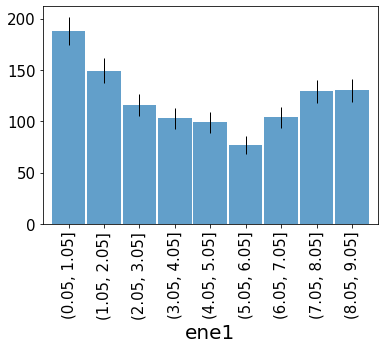

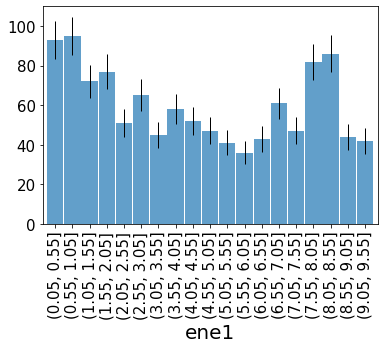

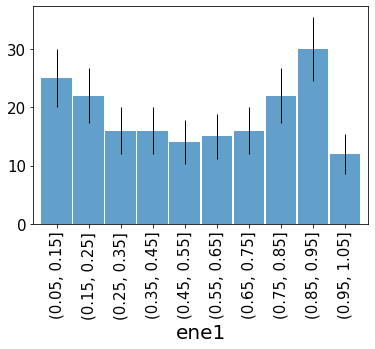

In [25]:
bin1 = np.arange(0.05,10,1)
bin2 = np.arange(0.05,10,0.5)
bin3 = np.arange(0.05,10,0.1)
data1 = databasic.groupby(pd.cut(datadf['ene1'], bins=bin1))
data2 = databasic.groupby(pd.cut(datadf['ene1'], bins=bin2))
data3 = databasic.groupby(pd.cut(datadf['ene1'], bins=bin3))

count1 = data1['ene1'].count()
count2 = data2['ene1'].count()
count3 = data3['ene1'].count()


plt.figure()
count1.plot.bar(yerr=count1**0.5,width=0.95,alpha=0.7)
plt.figure()
count2.plot.bar(yerr=count2**0.5,width=0.95,alpha=0.7)
plt.figure()
count3[:10].plot.bar(yerr=count3**0.5,width=0.95,alpha=0.7)


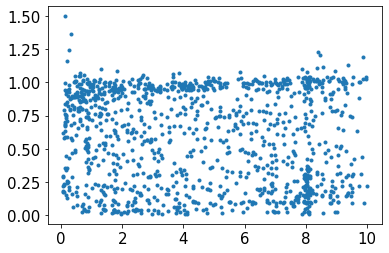

In [29]:
plt.plot(databasic.ene1,databasic.sigma,'.')

In [30]:
import bokeh

In [32]:
from bokeh.plotting import figure, output_file, show
p = figure(plot_width=400, plot_height=400)

# add a circle renderer with a size, color, and alpha
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=20, color="navy", alpha=0.5)

# show the results
show(p)